# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [10]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [11]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")
px.set_mapbox_access_token(mapbox_token)

In [9]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("mapbox_api_key")

px.set_mapbox_access_token(mapbox_token)
map1.show(mapbox_style= "open-street-map")

# Import Data

In [12]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

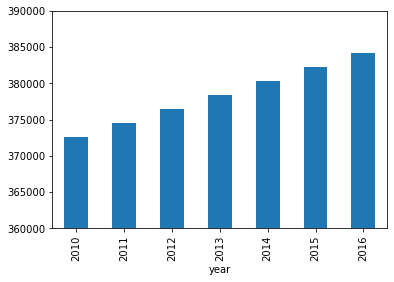

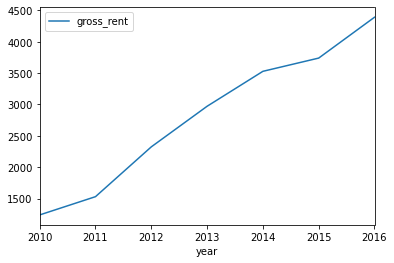

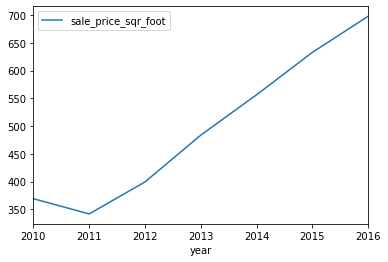

In [13]:
# housing per year
dataframe_means = sfo_data.groupby(by = ["year"]).mean()

units_per_year = dataframe_means["housing_units"]

units_per_plot = units_per_year.plot.bar(ylim = [360000, 390000])

# average sale price per year

average_rent_sale = dataframe_means.drop(columns = ["housing_units"])

avg_rent = average_rent_sale.drop(columns= "sale_price_sqr_foot")

avg_rent_plot = avg_rent.plot.line()

#average rent prrice per year

avg_sale = average_rent_sale.drop(columns= "gross_rent")
avg_sale_plot = avg_sale.plot.line()


# average price per square foot organized by neighborhood

avg_price_neighborhood = sfo_data.groupby(by= ["year"]+["neighborhood"]).mean()

avg_neighborhood_price_plot = avg_price_neighborhood['sale_price_sqr_foot'].hvplot(
    xlabel='year',
    ylabel='average sale per square foot',
    label=' ',
    groupby='neighborhood',
)

# top ten most expensive neighborhoods

neighborhood_data = sfo_data.groupby(by = "neighborhood").mean()
neighborhood_data = neighborhood_data["sale_price_sqr_foot"]
neighborhood_data = neighborhood_data.sort_values(ascending=False)

most_expensive = neighborhood_data[0:10]

most_expensive_plot = most_expensive.hvplot.bar(
    xlabel = "neighborhood",
    ylabel = "average sale price/sqr foot",
    height= 400,
    width= 1000,
    title = "top 10 most expensive neighborhoods")

# parallel coordinates

expensive_most = sfo_data.groupby("neighborhood").mean().sort_values(ascending=False, by = "sale_price_sqr_foot")
parallel_coord_plot = px.parallel_coordinates(expensive_most.head(10))


# parallel categories

para_help_frame = expensive_most.reset_index()
paralell_cat_plot = px.parallel_categories(para_help_frame.head(10))

# mapbox

neighborhood_mean = sfo_data.groupby(by=["neighborhood"]).mean()
neighborhood_mean = neighborhood_mean.reset_index()

neighborhood_mean.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
neighborhood_mean.head()
neighborhood_mean_long_lat = pd.merge(neighborhood_mean, df_neighborhood_locations, on="Neighborhood")


map = px.scatter_mapbox(
    neighborhood_mean_long_lat,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
)

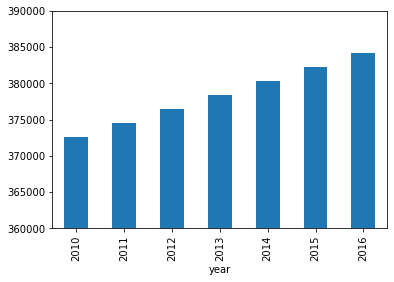

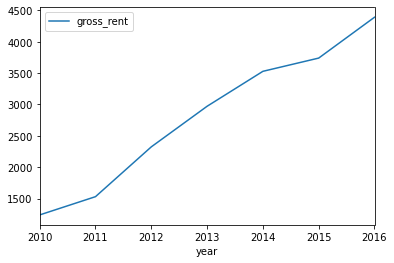

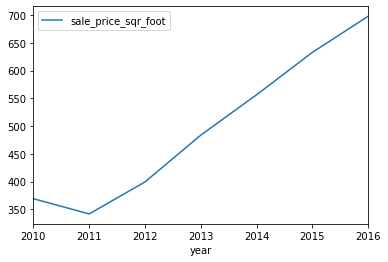

In [4]:
# housing per year
dataframe_means = sfo_data.groupby(by = ["year"]).mean()

units_per_year = dataframe_means["housing_units"]

units_per_plot = units_per_year.plot.bar(ylim = [360000, 390000])

# average sale price per year

average_rent_sale = dataframe_means.drop(columns = ["housing_units"])

avg_rent = average_rent_sale.drop(columns= "sale_price_sqr_foot")

avg_rent_plot = avg_rent.plot.line()

#average rent prrice per year

avg_sale = average_rent_sale.drop(columns= "gross_rent")
avg_sale_plot = avg_sale.plot.line()


# average price per square foot organized by neighborhood

avg_price_neighborhood = sfo_data.groupby(by= ["year"]+["neighborhood"]).mean()

avg_neighborhood_price_plot = avg_price_neighborhood['sale_price_sqr_foot'].hvplot(
    xlabel='year',
    ylabel='average sale per square foot',
    label=' ',
    groupby='neighborhood',
)

# top ten most expensive neighborhoods

neighborhood_data = sfo_data.groupby(by = "neighborhood").mean()
neighborhood_data = neighborhood_data["sale_price_sqr_foot"]
neighborhood_data = neighborhood_data.sort_values(ascending=False)

most_expensive = neighborhood_data[0:10]

most_expensive_plot = most_expensive.hvplot.bar(
    xlabel = "neighborhood",
    ylabel = "average sale price/sqr foot",
    height= 400,
    width= 1000,
    title = "top 10 most expensive neighborhoods")

# parallel coordinates

expensive_most = sfo_data.groupby("neighborhood").mean().sort_values(ascending=False, by = "sale_price_sqr_foot")
parallel_coord_plot = px.parallel_coordinates(expensive_most.head(10))


# parallel categories

para_help_frame = expensive_most.reset_index()
paralell_cat_plot = px.parallel_categories(para_help_frame.head(10))

# mapbox

neighborhood_mean = sfo_data.groupby(by=["neighborhood"]).mean()
neighborhood_mean = neighborhood_mean.reset_index()

neighborhood_mean.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
neighborhood_mean.head()
neighborhood_mean_long_lat = pd.merge(neighborhood_mean, df_neighborhood_locations, on="Neighborhood")

map1 = px.scatter_mapbox(
    neighborhood_mean_long_lat,
    lat="Lat",
    lon= "Lon",
    color = "Neighborhood"
)
px.set_mapbox_access_token(mapbox_token)
map1.show(mapbox_style= "open-street-map")
map1.show()


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [18]:
# YOUR CODE HERE!

average_pricing = pn.Column(avg_neighborhood_price_plot, avg_sale_plot , avg_rent_plot)

parallel_info = pn.Row(paralell_cat_plot, parallel_coord_plot)

expensive_info = pn.Column(most_expensive_plot, map)


final_dash = pn.Tabs(
    ("Averages", average_pricing),
    ("Parallel",parallel_info),
    ("Pricing" ,expensive_info))


## Serve the Panel Dashboard

In [19]:
final_dash.servable()

Tabs
    [0] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
    [1] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [2] Column
        [0] HoloViews(Bars)
        [1] Plotly(Figure)